In [18]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [19]:
import os
os.chdir("/gdrive/MyDrive/Çalışma ortamı/")


In [20]:
!ls

'matris vektor.ipynb'   RakamTanima_CNN.py   Rakam_Tanima.ipynb   save_models   Untitled6.ipynb


In [10]:
pip install keras

In [11]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import load_model
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random


In [13]:
# veri internet çekme
#veri seti yükle

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

print("x_train shape:",x_train.shape)
print(x_train.shape[0],"egitim örnekleri")

print(x_test.shape[0],"test örnekleri")
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


x_train shape: (60000, 28, 28)
60000 egitim örnekleri
10000 test örnekleri
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


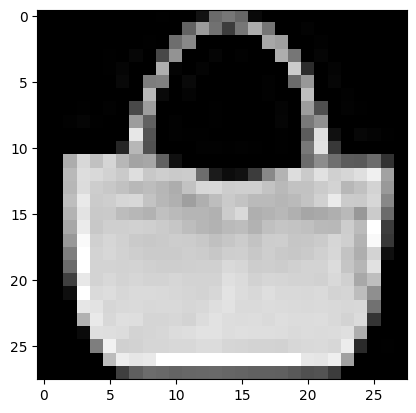

In [15]:
plt.imshow(x_train[100],cmap="gray")

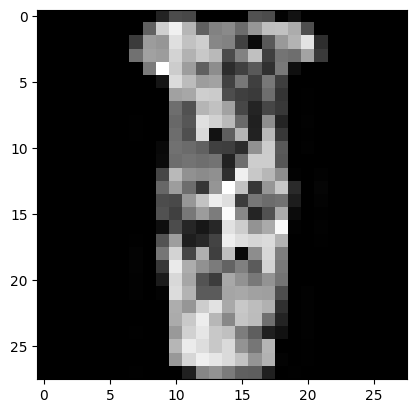

In [16]:
plt.imshow(x_test[100],cmap="gray")

In [17]:
fashion_mnist_labels=np.array([
    "tişort/üst",
    "pantolon",
    "kazak",
    "elbise",
    "ceket",
    "sandalet",
    "gömlek",
    "sneaker",
    "canta",
    "bilekte bot"
])

In [21]:
root="/gdrive/My drive/Çalışma ortamı/save_models/"
model=load_model(root+"model_fashion-mnist_cnn_train2_epoch24.h5")

def convertMnistData(image):
    img = image.astype('float32')
    img /= 255

    return image.reshape(1,28,28,1)

plt.figure(figsize=(16,16))

right = 0
mistake = 0
prefictionNum = 200

for i in range(prefictionNum):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertMnistData(image)

    plt.subplot(10, 10, i+1)
    plt.imshow(image,  cmap=cm.gray_r)
    plt.axis('off')

    ret = model.predict(data, batch_size=1)
    #yazdır(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n

    if y_test[index] == bestclass:
        plt.title(fashion_mnist_labels[bestclass])
        right += 1
    else:
        #tahmin edilen sınıf != gerçek sınıf
        plt.title(fashion_mnist_labels[bestclass] + "!=" + fashion_mnist_labels[y_test[index]], color='#ff0000')
        mistake += 1

plt.show()
print("Doğru tahminlerin sayısı:", right)
print("Hata sayısı:", mistake)
print("Doğru tahmin oranı:", right/(mistake + right)*100, '%')

OSError: ignored